# Laboratorio 13: Análisis de ecuaciones diferenciales
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   David Tobón Molina
2.   David Santiago Rodríguez

**Número del grupo**

Grupo 2

# **Introducción**


Un modelo matemático potencialmente podría permitir caracterizar fenómenos físico en diversos campos de la ciencia. Por esta razón, existen diferentes tipos de modelos matemáticos, cada uno con características específicas que se adaptan al objetivo que se desea alcanzar. En el caso de un modelo epidémico, su objetivo principal es predecir los picos de infección en un intervalo de tiempo bajo diferentes condiciones para optimizar las medidas de bioseguridad correspondientes y minimizar los efectos negativos sobre la población humana. Por lo tanto, muchas combinaciones pueden ser planteadas para hacer énfasis en una problemática específica y recopilar resultados para tomar la decisión más precisa. El modelo epidémico más común es el modelo *SI*, el cual involucra dos grupos poblacionales: susceptibles e infectados. Estos grupos interactuan entre sí, de manera que un porcentaje de los susceptibles pueden infectarse y, a su vez, un porcentaje de infectados pueden recuperarse para volver a ser susceptibles. Nótese que se trata de un comportamiento cíclico, el cual usualemente se representa por un diagráma de flujo.

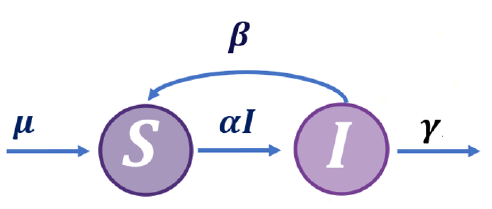

Acá hay parámetros adicionales de entrada y salida, los cuales, dependiendo del modelo, se pueden incluir para representar dinámicas vitales, tales como la natalidad y la mortalidad.


# **Descripción de la práctica**

En esta prática se desea analizar la dinámica de la receciente pandemia, COVID-19 en Colombia, donde mediante simulaciones acompañadas de aproximaciones numéricas se estudiar el efecto de los parámetros en un modelo *SIR*. Este modelo se representa matemáticamente mediante un sistema de ecuaciones diferenciales:

\begin{align*}
  &\frac{dS}{dt} = \mu + βI(t) - \frac{α}{N}S(t)I(t)\\
  &\frac{dI}{dt} = \frac{α}{N}S(t)I(t) - βI(t) - γI(t)\\
\end{align*}

Donde $α$, $ω$ y $β$, son parámetros constantes del sistema. A continuación se presentan los valores numéricos y el significado de cada parámetro:

- $\beta = 0.2 \frac{1}{día}$: Tasa de recuperación hospitalaria.
- $\alpha = 1 \frac{1}{día}$: Tasa de infección. 
- $\mu = 1560 \frac{Individuo}{día}$: Tasa de natalidad diaria.
- $\gamma = 0.2 \frac{1}{día}$: Tasa de mortalidad por COVID-19.
- $N = 50×10^6 Individuos$: Población inicial.

Para analizar el modelo anterior, se usará la función *odeint* de la librería *scipy.integrate*, la cual permite simular ecuaciones diferenciales mediante aproximaciones numéricas.

# **Descripción de la función *odeint***

Esta función aproxima la solución de una o un sistema de ecuaciones diferenciales mediante diferencias finitas. Recordando la aproximación de la derivada o gradiente vista en laboratorios anteriores, esta se usa para convertir un sistema de ecuaciones diferenciales en uno de ecuaciones algebráicas. Miremos el siguiente ejemplo:


\begin{align*}
  \frac{dy}{dx} = \frac{y-x}{y+x}
\end{align*}

Aproximando la derivada por diferencias finitas:

\begin{align*}
  \frac{y(x+h)-y(x)}{h} = \frac{y(x)-x}{y(x)+x}
\end{align*}

Despejando $y(x+h)$:

\begin{align*}
  y(x+h) = h\frac{y(x)-x}{y(x)+x} + y(x)
\end{align*}

Ahora, sea $x+h=x(k+1)$ y $x = x(k)$

\begin{align*}
  y[x(k+1)] = h\frac{y[x(k)]-x(k)}{y[x(k)]+x(k)} + y[x(k)]
\end{align*}

Con una condición inial $x(0)=x_0$, se puede comenzar a iterar hasta alcanzar algun criterio de parada. Note que el algoritmo depende tanto de una condición inicial como un tamaño de paso, por lo que es importante definir estos parámetros. La función *odeint* establece como predeterminado un tamaño de paso $h$, sin embargo, este puede ser modificado, pero en pocos casos esto tiene un efecto significativo.


 Para esto, siga estos pasos:

1. Haga un análisis dimensional, es decir, determine si las ecuaciones tienen coherencia en cuanto a las unidades.



\begin{align*}
  &\frac{dS}{dt} (\frac{individuo}{día}) = \mu (\frac{individuo}{día}) + β(\frac{1}{día})I(t)(individuo) - \frac{α}{N}(\frac{1}{día*individuo})S(t)(individuo)I(t)(individuo)\\
  &(\frac{individuo}{día}) = (\frac{individuo}{día}) + (\frac{individuo}{día}) - (\frac{individuo}{día})\\
  &(\frac{individuo}{día}) = (\frac{individuo}{día})\\
  \thinspace\\
  &\frac{dI}{dt} (\frac{individuo}{día})= \frac{α}{N}(\frac{1}{día*individuo})S(t)(individuo)I(t)(individuo) - β(\frac{1}{día})I(t)(individuo) - γ\frac{1}{día}I(t)(individuo)\\
  &(\frac{individuo}{día}) = (\frac{individuo}{día}) - (\frac{individuo}{día}) - (\frac{individuo}{día})\\
  &(\frac{individuo}{día}) = (\frac{individuo}{día})\\

\end{align*}

*Análisis acá*

2. Importe las liberías y funciones necesarias.

In [68]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

2. Establezca los valores de los parámetros constantes.

In [69]:
beta = 0.2
alpha = 1
mu = 1560
gamma = 0.2
N = 50e6

3. Ahora debe crear la función de entrada. Esta contiene el sistema de ecuaciones diferenciales mostrado anteriormente, la cual debe recibir como parámetro una variable que continene las vaiables de estado, es decir, si le entra como parámetro la variable $z$, entonces, dentro de la función se debe definir *S, I = z*. También le debe entrar como parámetro el vector de tiempo y argumentos adicionales si es necesario. debe retornar las derivadas de las variables de estado, es decir, $S$ y $I$ (deben estar en el mismo orden como se definieron en z).

In [70]:
def func(x, t):
    S, I = x
    dS = mu + beta*I - (alpha*S*I/N)
    dI = (alpha*S*I/N) - beta*I - gamma*I
    return [dS, dI]

4. Cree el vector de tiempo, este debe ir desde cero hasta 2 meses en días. Además,establezca las condiciones iniciales dado que la pandemia arranca con el 99% 
de población susceptible.

In [71]:
time_vector = np.linspace(0, 60, 100)
x_1 = 0.99*N
x_2 = 0.01*N
x_0 = [x_1, x_2]

5. Analice la estructura de la función *odeint*. A esta le entra como parámetro la función de entrada, es decir, la función creada anteriormente, el vector de condiciones iniciales, el vector de tiempo y argumentos adicionales. Esta retorna una matriz cuyas columnas corresponden a la solución de las variables de estado en el tiempo en el orden impuesto en la función de entrada. Use esta función para simular el sistema.

In [72]:
sol = odeint(func, x_0, time_vector)
print(sol)

[[4.95000000e+07 5.00000000e+05]
 [4.92143652e+07 7.13764767e+05]
 [4.88106330e+07 1.01471125e+06]
 [4.82450831e+07 1.43416883e+06]
 [4.74625708e+07 2.01065011e+06]
 [4.63979412e+07 2.78766821e+06]
 [4.49819284e+07 3.80755562e+06]
 [4.31538346e+07 5.09958544e+06]
 [4.08816254e+07 6.66247490e+06]
 [3.81854744e+07 8.44570541e+06]
 [3.51543293e+07 1.03396742e+07]
 [3.19422357e+07 1.21861444e+07]
 [2.87387011e+07 1.38119344e+07]
 [2.57235903e+07 1.50731518e+07]
 [2.30281745e+07 1.58883734e+07]
 [2.07186928e+07 1.62467487e+07]
 [1.88030552e+07 1.61934529e+07]
 [1.72499239e+07 1.58052649e+07]
 [1.60086967e+07 1.51681709e+07]
 [1.50242341e+07 1.43625060e+07]
 [1.42452897e+07 1.34557148e+07]
 [1.36281190e+07 1.25004600e+07]
 [1.31371907e+07 1.15356603e+07]
 [1.27444812e+07 1.05887310e+07]
 [1.24282563e+07 9.67804700e+06]
 [1.21718036e+07 8.81516806e+06]
 [1.19623112e+07 8.00667053e+06]
 [1.17899509e+07 7.25557797e+06]
 [1.16471590e+07 6.56244178e+06]
 [1.15280869e+07 5.92614013e+06]
 [1.142818

6. Grafique lo anterior en tres figuras, una para cada nivel de saturación. En cada gráfica se deben incluir ambas poblaciones en porcentaje con respecto a la población total. Recuerde incluir títulos, ejes, uniades y leyendas.

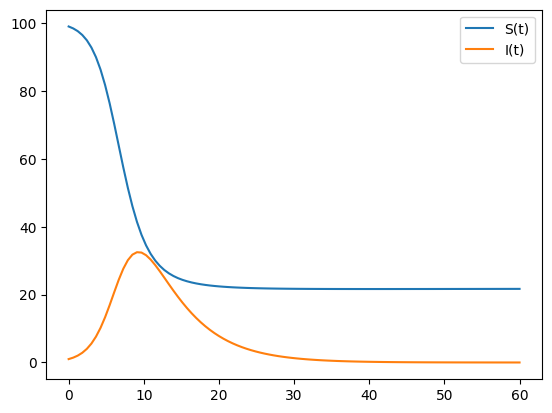

In [76]:
plt.plot(time_vector, sol[:, 0]*100/N, label='S(t)')
plt.plot(time_vector, sol[:, 1]*100/N, label='I(t)')
plt.legend()
plt.show()

7. Si todo va bien, su población total debería disminuir aproximadamente al 20%, es decir, cerca del 80% de las personas murieron por la enfermedad. Para evitar esto, es posible modificar los parámetros para analizar en qué situación esto no sucedería. Algunas opciones serían:

- Disminuir la tasa de contagio
- Aumentar la tasa de recuperación

Note que no tendría sentido modificar los demás parámetros debido a que estos están ligados a factores externos a la enfermedad, es decir, la natalidad y la tasa de mortalidad asociada a la letalidad del virus. Modifique los parámetros mencionados de manera que la población total llege al 80% aproximadamente. Vuelva a graficar con sus nuevos parámetros e indique cuáles son en el título del gráfico.

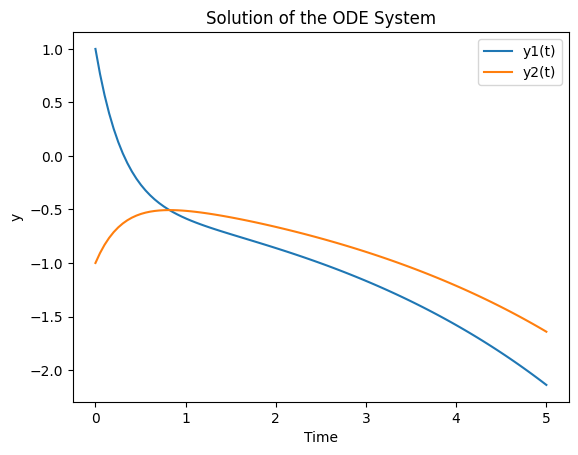

8. Note que se trata de un sistema estable, es decir, sin importar las condiciones iniciales, cuando el tiempo tiende a infinito, ambas poblaciones llegan al mismo valor. Modifique los parámetros como estaban originalmente. Ahora, haga tres gráficos, el primero arrancando con el 30% de población infectada, el segundo con 50% y el tercero con 70%. 

9. Analice sus resultados respondiendo las siguientes preguntas:

- ¿Cómo es la relación entre la población total con la tasa de contagio y con la tasa de recuperación?
- ¿Por qué cree que la población infectada llega a cero?
- ¿Qué combinación podría tener para que toda la población muera?
- ¿Por qué cree que se trata de un sistema estable?